In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Set plot style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

## 1. Load Data
Loading the preprocessed dataset.

In [2]:
# Note: The index column is 'datetime' for this dataset
df = pd.read_csv('../datasets/kaggle_btcusd_hourly.csv', parse_dates=['datetime'], index_col='datetime')
print(df.head())
print(df.info())
print(df.describe())

                     btc_usd
datetime                    
2012-01-01 10:00:00     4.58
2012-01-01 11:00:00     4.58
2012-01-01 12:00:00     4.58
2012-01-01 13:00:00     4.58
2012-01-01 14:00:00     4.58
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 122468 entries, 2012-01-01 10:00:00 to 2025-12-21 23:00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   btc_usd  122468 non-null  float64
dtypes: float64(1)
memory usage: 1.9 MB
None
             btc_usd
count  122468.000000
mean    21531.758120
std     30178.725218
min         4.140000
25%       445.000000
50%      7326.230000
75%     31597.165000
max    126111.000000


## 2. Time Series Plot
Visualizing the BTC Price over time.

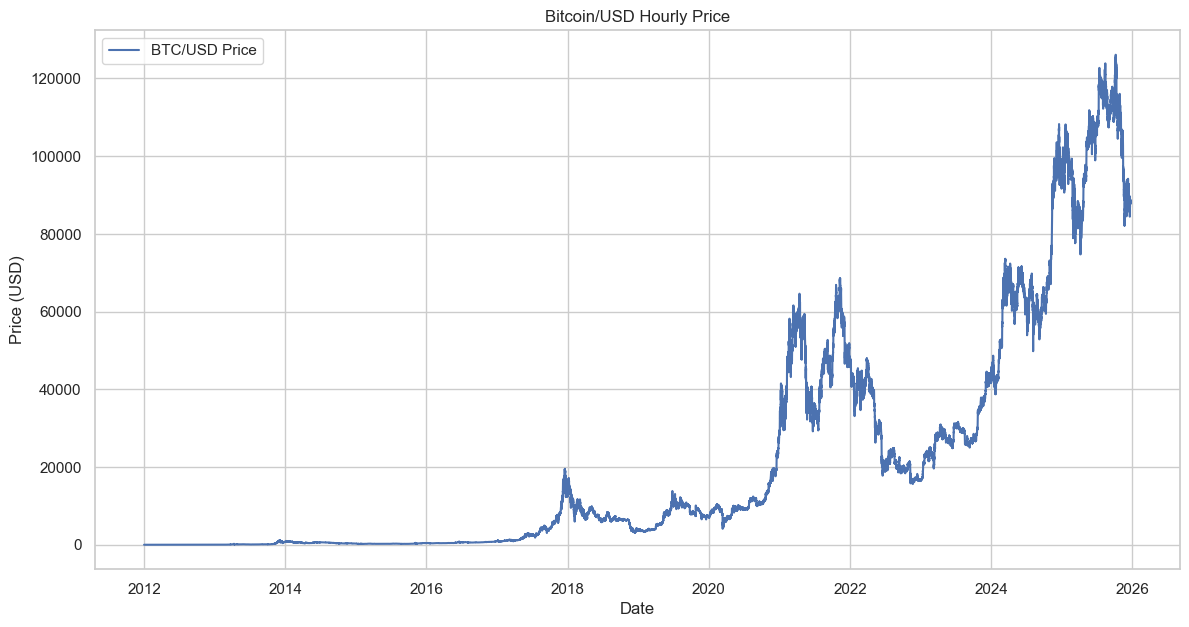

In [3]:
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['btc_usd'], label='BTC/USD Price')
plt.title('Bitcoin/USD Hourly Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

## 3. Decomposition
Decomposing the time series into trend, seasonal, and residual components.
Since this is **hourly data**, we use a period of **24** to capture daily seasonality.

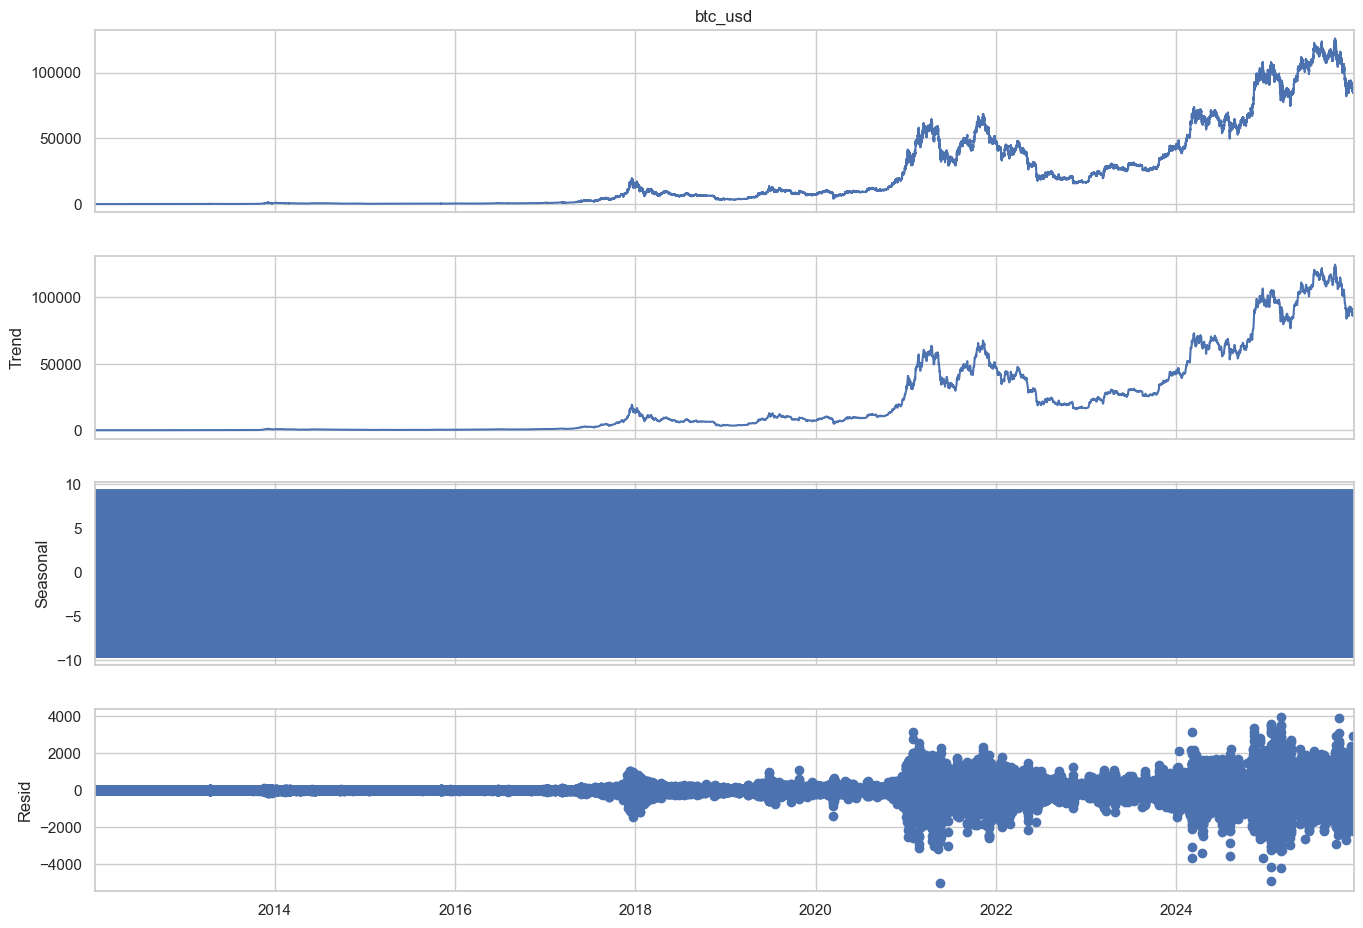

In [4]:
# Decompose the time series
# period=24 for hourly data (daily seasonality)
# Note: For very long time series, decomposition might take time or be cluttered.
# We might want to resample or look at a shorter window, but we'll try full series first.
decomposition = seasonal_decompose(df['btc_usd'], model='additive', period=24)

# Plot the decomposition
fig = decomposition.plot()
fig.set_size_inches(14, 10)
plt.show()

## 4. Autocorrelation and Partial Autocorrelation
Checking for serial correlation in the data.

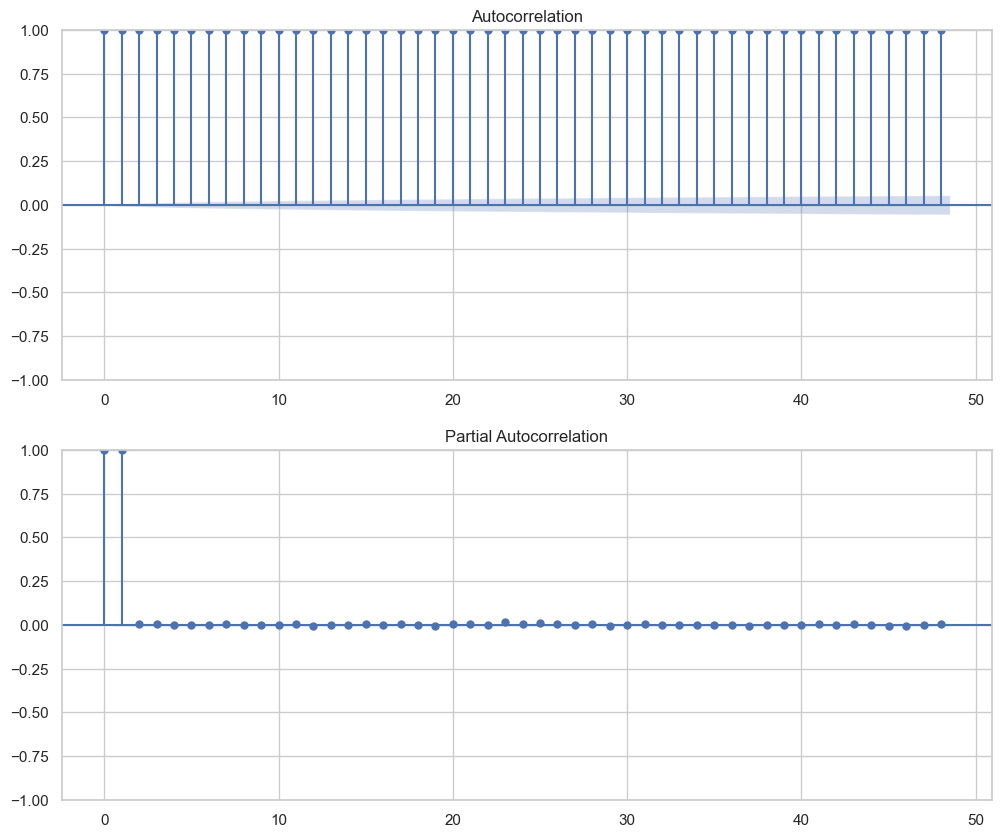

In [5]:
fig, ax = plt.subplots(2, 1, figsize=(12, 10))
plot_acf(df['btc_usd'], ax=ax[0], lags=48)
plot_pacf(df['btc_usd'], ax=ax[1], lags=48, method='ywm')
plt.show()

## 5. Distribution of Data
Checking the distribution of prices.

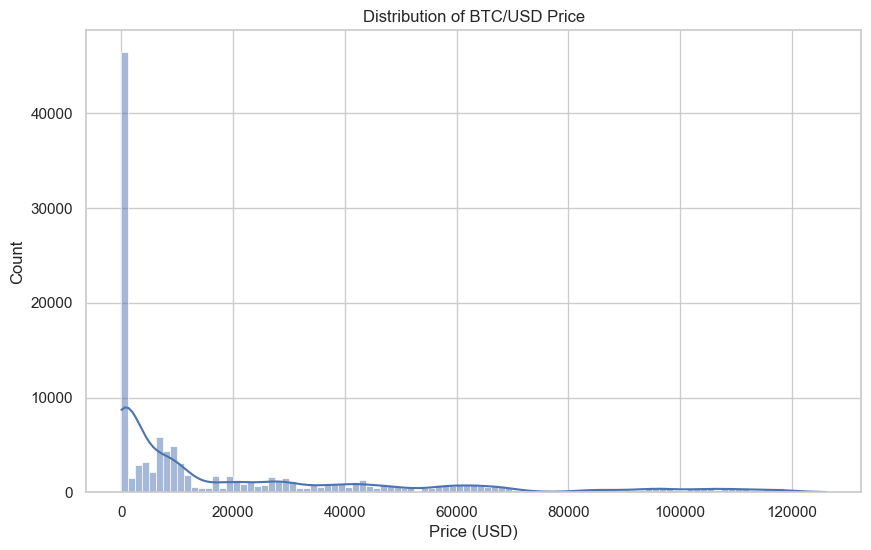

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(df['btc_usd'], kde=True)
plt.title('Distribution of BTC/USD Price')
plt.xlabel('Price (USD)')
plt.show()

## 6. Stationarity Test (ADF Test)
Checking if the time series is stationary.

In [7]:
result = adfuller(df['btc_usd'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')

if result[1] < 0.05:
    print("Reject the null hypothesis. Data is stationary.")
else:
    print("Fail to reject the null hypothesis. Data is non-stationary.")

ADF Statistic: -0.17765633252983268
p-value: 0.9411330451134685
Critical Values:
	1%: -3.430403427210573
	5%: -2.8615636140376512
	10%: -2.5667825689176342
Fail to reject the null hypothesis. Data is non-stationary.


## 7. Differencing (if non-stationary)
If the data is non-stationary, we look at the first difference.

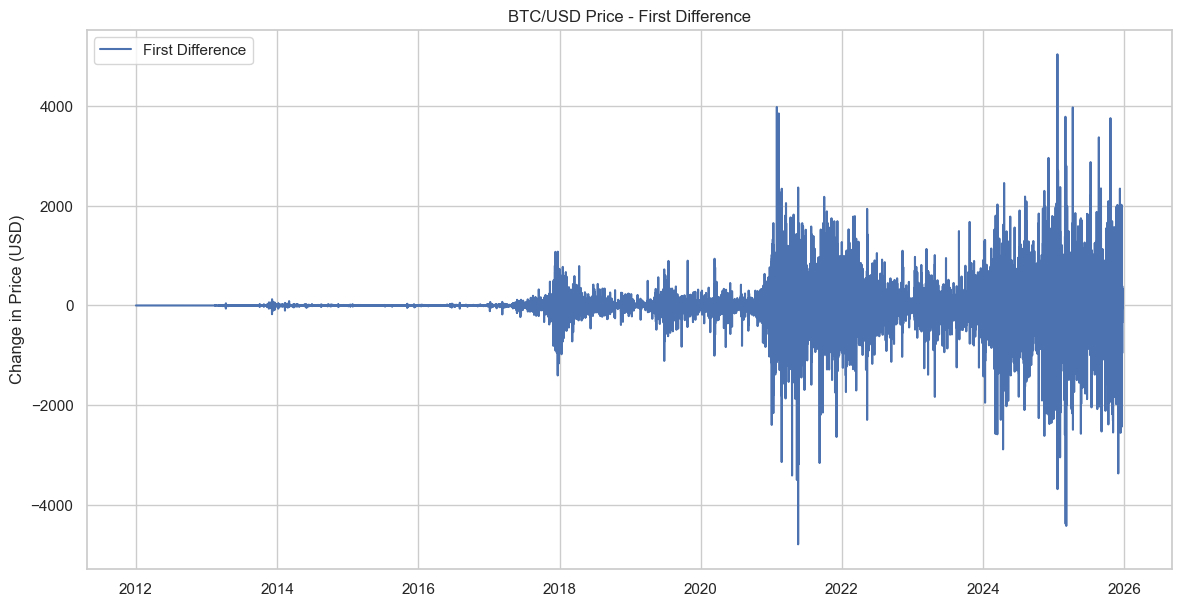

ADF Statistic (Diff): -42.306529102686056
p-value (Diff): 0.0


In [8]:
df['btc_diff'] = df['btc_usd'].diff()

plt.figure(figsize=(14, 7))
plt.plot(df.index, df['btc_diff'], label='First Difference')
plt.title('BTC/USD Price - First Difference')
plt.ylabel('Change in Price (USD)')
plt.legend()
plt.show()

# Check stationarity of differenced data
df_diff = df['btc_diff'].dropna()
result_diff = adfuller(df_diff)
print('ADF Statistic (Diff):', result_diff[0])
print('p-value (Diff):', result_diff[1])